# Homework 06, Matt Briskey

### 1. Explain the idea and calculation steps of PCA.

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. The first principal component (PC1) explains the largest amount of variance, followed by the second principal component (PC2), and so on. Each principal component is orthogonal (uncorrelated) to the others, ensuring that the transformed variables are independent.

The steps involved in PCA are listed below:
1. Standardize the data
2. Construct the covariance matrix
3. Decompose the covariance matrix into eigenvectors and eigenvalues
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
5. Select the number of components
6. Project the data onto the new feature space
7. Calculate the expalined variance ratio 

### 2. Given the following data set, how many percent of the total variance can be explained by the top 2 principal components?

In [ ]:
from sklearn.datasets import make_blobs
from pandas import DataFrame
# generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)

In [6]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Calculate the percentage of total variance explained by the top 2 principal components
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance_ratio)
percentage_explained = total_variance_explained * 100

print(f"Percentage of total variance explained by the top 2 principal components: {percentage_explained:.2f}%")

Percentage of total variance explained by the top 2 principal components: 76.26%


### 3. What is the most significant difference between PCA and LDA?

PCA focuses on capturing variance in the data without considering class labels, while LDA aims to find a subspace that maximizes class separability. PCA is unsupervised and widely used for data exploration, while LDA is supervised and primarily used for classification tasks.

### 4. Based on the data set given above, split data into 80% training and 20% test with stratification, apply PCA to pick the top 2 components, apply a classification algorithm, print the number of misclassified samples in the test set.

In [18]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Apply PCA to select the top 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a pipeline with Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Optional: Scale the features
    ('classifier', LogisticRegression())  # Use Logistic Regression for classification
])

# Fit the pipeline on the training data
pipeline.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = pipeline.predict(X_test_pca)

# Calculate the number of misclassified samples
misclassified_samples = (y_pred != y_test).sum()

# Print the number of misclassified samples
print("Number of misclassified samples:", misclassified_samples)


Number of misclassified samples: 0


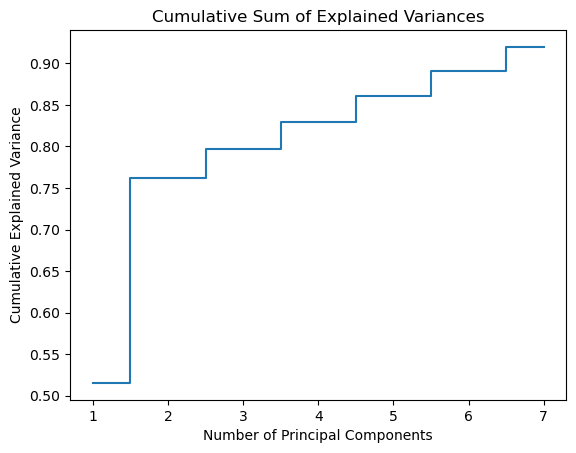

In [19]:
# Graph the cumulative explained variance with different numbers of components

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)

# Perform PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

# Get the explained variances from PCA
explained_variances = pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variances
cumulative_variances = np.cumsum(explained_variances)

# Plot the cumulative variances using Matplotlib's step function
plt.step(range(1, len(cumulative_variances) + 1), cumulative_variances, where='mid')

# Set the plot title and labels
plt.title('Cumulative Sum of Explained Variances')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Show the plot
plt.show()


### 5. Apply LDA to the above problem.

In [20]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Create a pipeline with LDA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Optional: Scale the features
    ('lda', LinearDiscriminantAnalysis(n_components=2)),   # Apply LDA to select the top 2 components
    ('classifier', LogisticRegression())  # Use Logistic Regression for classification
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = pipeline.predict(X_test)

# Calculate the number of misclassified samples
misclassified_samples = (y_pred != y_test).sum()

# Print the number of misclassified samples
print("Number of misclassified samples:", misclassified_samples)


Number of misclassified samples: 0
